## ANN classifier applied on handwritten digits

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.neural_network import MLPClassifier
digits = load_digits()
X = digits.data
y = digits.target


In [3]:
X.shape, y.shape

((1797, 64), (1797,))

In [5]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

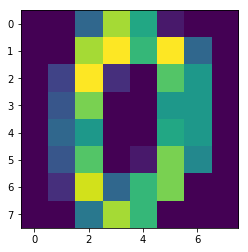

In [10]:
# Plotting first digit
import matplotlib.pyplot as plt
#plt.matshow(digits.images[0])
plt.imshow(X[0].reshape(8, 8))
# Printing first digit '0' in matrix form

In [19]:
from sklearn.model_selection import train_test_split
X_std = StandardScaler()
X_std.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Grid Search - Neural Network
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


An MLP classifier has been used with hidden layers of 100 and 50 in the first and second
hidden layers consecutively. An Adam optimizer has been used for reduction of errors. A
Relu activation function has been used for all the neurons with learning rate as 0.0001.
Finally, the total number of iterations as 300 at initiation:

In [21]:
pipeline = Pipeline([('mlp', MLPClassifier(hidden_layer_sizes=(100, 50, ),
                                          activation='relu', solver='adam', alpha=0.0001, max_iter=300))])

The above parameters are used only for the initiation of the classifier, whereas the following
code describes grid search using the pipeline function. The learning rate and maximum
number of iterations are used to find the best combinations. However, readers are
encouraged to add other features and test where even better results can be obtained:

In [22]:
parameters = {'mlp__alpha': (0.001, 0.01, 0.1, 0.3, 0.5, 1.0),
             'mlp__max_iter': (100, 200, 300)}

Grid search with five-fold cross-validation has been used with default number of cores with
scoring as accuracy used. Nonetheless, you can change it to 10-fold cross-validation and so
on, to see how accuracy changes with a change in the cross-validation metrics:

In [25]:
grid_search_nn = GridSearchCV(pipeline, parameters, n_jobs=-1, cv=5, verbose=1, scoring='accuracy')
grid_search_nn.fit(X_train, y_train)

print('\n\nNeural Network Best Training score: %0.3f' % grid_search_nn.best_score_)
print('\nNeural Network Best parameters set:')
best_parameters = grid_search_nn.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))
    
pred_train = grid_search_nn.predict(X_train)
pred_test = grid_search_nn.predict(X_test)
print('\nNeural Network Training accuracy:', round(accuracy_score(y_train, pred_train), 4))
print('\nNeural Network Complete report of Training data\n', classification_report(y_train, pred_train))
print('\n\nNeural Network Grid Search - Train Confusion Matrix\n\n', pd.crosstab(y_train, pred_train,
                                                                                rownames=['actuall'], colnames=['Predicted']), sep='')
print('\n\nNeural Network Testing accuracy:', round(accuracy_score(y_test, pred_test), 4))
print('\nNeural Network Complete report of Testing data\n', classification_report(y_test, pred_test))
print('\n\nNeural Network Grid Search - Testing Confusion Matrix\n\n', pd.crosstab(y_test, pred_test,
                                                                                rownames=['actuall'], colnames=['Predicted']), sep='')

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   17.5s finished




Neural Network Best Training score: 0.955

Neural Network Best parameters set:
	mlp__alpha: 0.1
	mlp__max_iter: 300

Neural Network Training accuracy: 1.0

Neural Network Complete report of Training data
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       125
          1       1.00      1.00      1.00       132
          2       1.00      1.00      1.00       130
          3       1.00      1.00      1.00       129
          4       1.00      1.00      1.00       121
          5       1.00      1.00      1.00       116
          6       1.00      1.00      1.00       128
          7       1.00      1.00      1.00       124
          8       1.00      1.00      1.00       131
          9       1.00      1.00      1.00       121

avg / total       1.00      1.00      1.00      1257



Neural Network Grid Search - Train Confusion Matrix

Predicted    0    1    2    3    4    5    6    7    8    9
actuall                                

The previous figure illustrates that the best test accuracy obtained is 98.15 percentage,
which is predicting digits with exceptionally good accuracy.

In [ ]:
# References and credits to
# Statistics in Machine Learning